In [9]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [17]:
def get_avg_df(file_list):
    df_list = []
    for file in file_list:
        df_list.append(pd.read_csv(file))
    
    avg_df_list = []
    for df in df_list:
        avg_df_list.append(df.groupby(np.arange(len(df))//20).mean())
        
    return avg_df_list

In [25]:
def graph_avg_ending(files, label):
    avg_dfs = get_avg_df(files)

    fig, ax = plt.subplots()

    # Plot the dataframes
    avg_dfs[0].plot(kind='line', x='Step', y='Value', ax=ax, label = "Base")
    avg_dfs[1].plot(kind='line', x='Step', y='Value', ax=ax, color='red', label = "Explore")
    avg_dfs[2].plot(kind='line', x='Step', y='Value', ax=ax, color='green', label = "Human")
    avg_dfs[3].plot(kind='line', x='Step', y='Value', ax=ax, color='purple', label = "Coin")


    # Set the x-axis label
    ax.set_xlabel('Step')

    # Set the y-axis label
    ax.set_ylabel(label)

    # Show the plot
    plt.show()

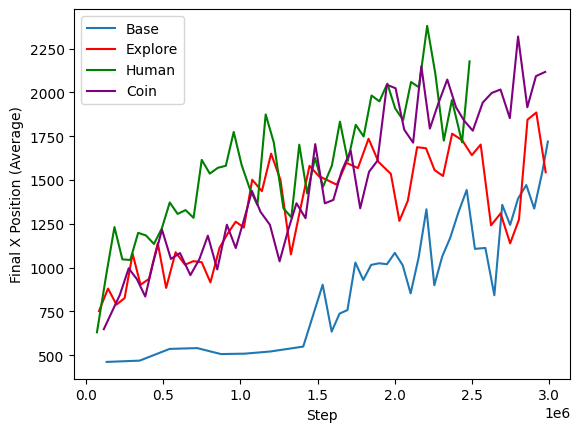

In [22]:
x_pos_files = ["Base_Ending_X_Pos.csv", "Exploration_Ending_X_Pos.csv", "Human_Ending_X_Pos.csv", "Coin_Ending_X_Pos.csv"]
graph_avg_ending(x_pos_files, "Final X Position (Average)")

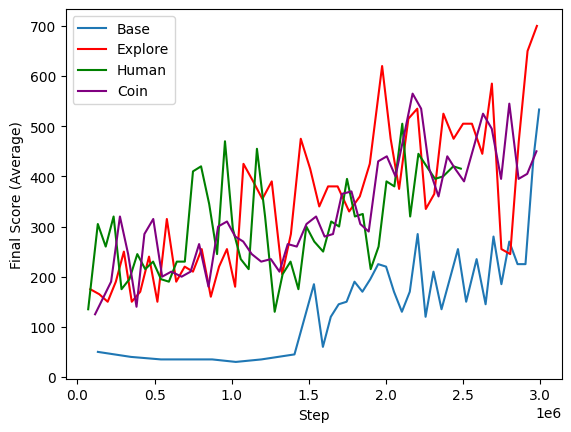

In [26]:
score_files = ["Base_Ep_Score.csv", "Exploration_Ep_Score.csv", "Human_Ep_Score.csv", "Coin_Ep_Score.csv"]
graph_avg_ending(score_files, "Final Score (Average)")

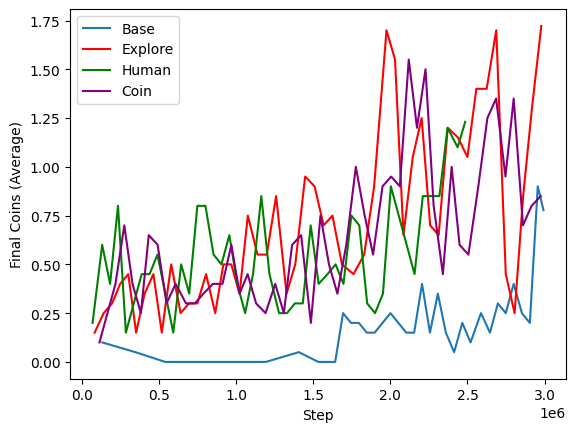

In [28]:
coin_files = ["Base_Ep_Coins.csv", "Exploration_Ep_Coins.csv", "Human_Ep_Coins.csv", "Coin_Ep_Coins.csv"]
graph_avg_ending(coin_files, "Final Coins (Average)")

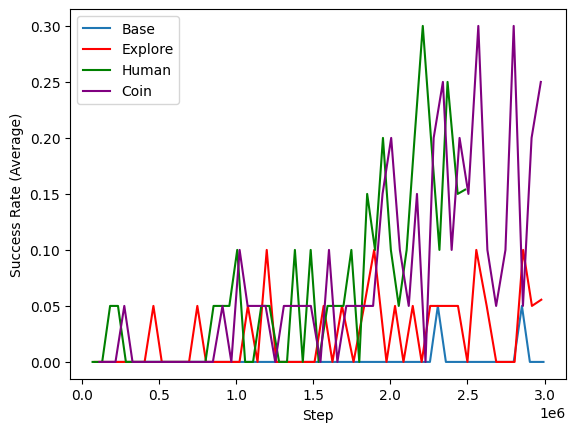

In [32]:
success_files = ["Base_Ep_Success.csv", "Exploration_Ep_Sucess.csv", "Human_Ep_Success.csv", "Coin_Ep_Success.csv"]
graph_avg_ending(success_files, "Success Rate (Average)")

In [34]:
human_df = pd.read_csv("Human_Ep_Success.csv")
base_df = pd.read_csv("Base_Ep_Success.csv")
explore_df = pd.read_csv("Exploration_Ep_Sucess.csv")
coin_df = pd.read_csv("Coin_Ep_Success.csv")

In [41]:
first_success_human = min(human_df.loc[human_df['Value'] == 1.0]["Step"])
first_success_base = min(base_df.loc[base_df['Value'] == 1.0]["Step"])
first_success_explore = min(explore_df.loc[explore_df['Value'] == 1.0]["Step"])
first_success_coin = min(coin_df.loc[coin_df['Value'] == 1.0]["Step"])
print(first_success_human, first_success_base, first_success_explore, first_success_coin)

163840 2304000 473600 279040


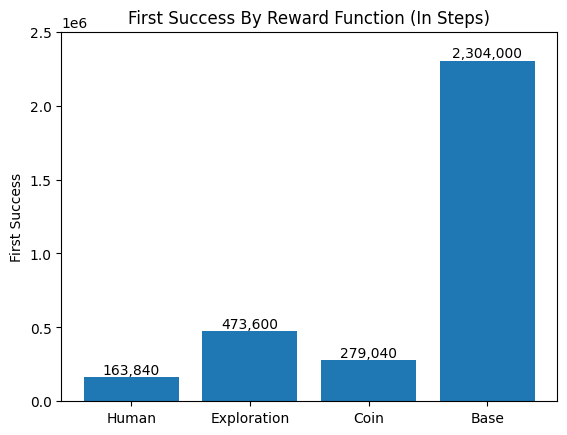

In [46]:
labels = ['Human', 'Exploration', 'Coin', 'Base']
counts = [first_success_human, first_success_explore, first_success_coin, first_success_base]

fig, ax = plt.subplots()
bar_container = ax.bar(labels, counts)
ax.set(ylabel='First Success', title='First Success By Reward Function (In Steps)', ylim=(0, 2500000))
ax.bar_label(bar_container, fmt='{:,.0f}')

plt.show()

In [51]:
rate_success_human = human_df.tail(50)['Value'].mean()
rate_success_base = base_df.tail(50)['Value'].mean()
rate_success_explore = explore_df.tail(50)['Value'].mean()
rate_success_coin = coin_df.tail(50)['Value'].mean()
print(rate_success_human, rate_success_base, rate_success_explore, rate_success_coin)

0.18 0.0 0.06 0.18


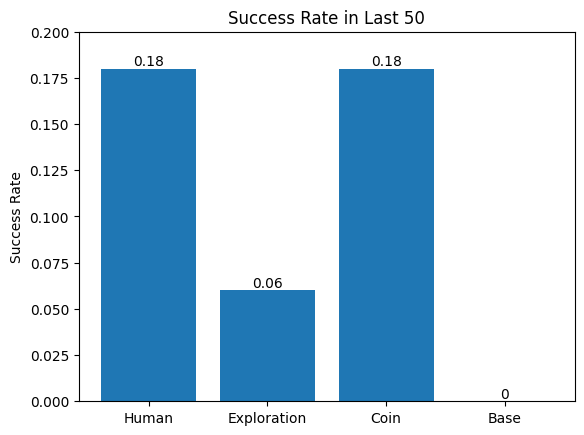

In [56]:
labels = ['Human', 'Exploration', 'Coin', 'Base']
counts = [rate_success_human, rate_success_explore, rate_success_coin, rate_success_base]

fig, ax = plt.subplots()
bar_container = ax.bar(labels, counts)
ax.set(ylabel='Success Rate', title='Success Rate in Last 50', ylim=(0, 0.2))
ax.bar_label(bar_container)

plt.show()